## CNN (Convolutional Neural Network)
A Convolutional Neural Network (CNN) is a type of deep learning model designed to process data with a grid-like topology, such as images. Images are 2D grids of pixels, so CNNs are perfect for tasks like image recognition, object detection, and image segmentation.  

CNNs are inspired by how the human visual cortex works — focusing on small parts of an image and building understanding step-by-step.

### 🧱 Architecture of a CNN (Step-by-Step)
Let's break down the typical CNN architecture into layers:

#### 1. Input Layer
What it does: Takes in raw pixel values of an image.

Example: For a grayscale image of size 28×28, the input shape is (28, 28, 1) (1 channel). For a color image (RGB), it might be (224, 224, 3).

#### 2. Convolutional Layer
Core idea: Instead of connecting every pixel to every neuron (like in fully connected layers), CNNs use filters (kernels) that scan over the image.

Each filter is a small matrix (like 3×3 or 5×5) that detects a specific feature (like an edge or texture).

As the filter moves across the image (a process called convolution), it computes a dot product between the filter and the region of the image it’s covering, producing a feature map.

📌 Example:
If the filter detects vertical lines, then the output (feature map) will highlight all vertical edges in the image.

#### 3. Activation Function (ReLU)
Applies the Rectified Linear Unit (ReLU) function:

f(x)=max(0,x)  
Introduces non-linearity to the model, allowing it to learn more complex patterns.

#### 4. Pooling Layer
Also known as subsampling or downsampling.

Goal: Reduce the spatial size of feature maps to decrease the number of parameters and computation.

Types:

Max pooling: Takes the maximum value from a region.

Average pooling: Takes the average value.

📌 Example:
A 2×2 max pool on a 4×4 feature map reduces it to 2×2.

#### 5. Flattening
After several convolution + pooling layers, the data is transformed into a 1D vector to be fed into the next stage.

#### 6. Fully Connected (Dense) Layers
Neurons in these layers are fully connected to all activations from the previous layer.

This part works just like a traditional neural network and performs classification or regression.

#### 7. Output Layer
The final layer gives predictions.

For binary classification, a sigmoid activation is used.

For multi-class classification, a softmax activation is used.

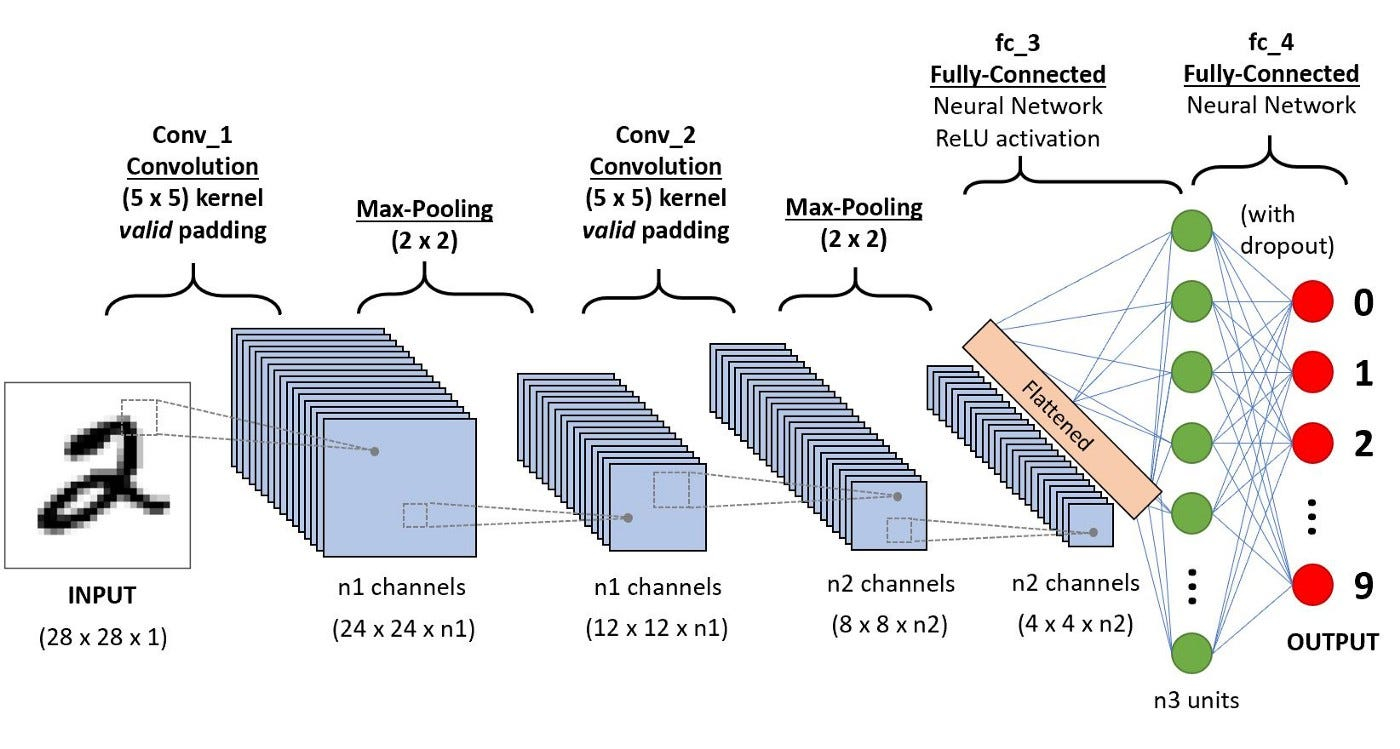

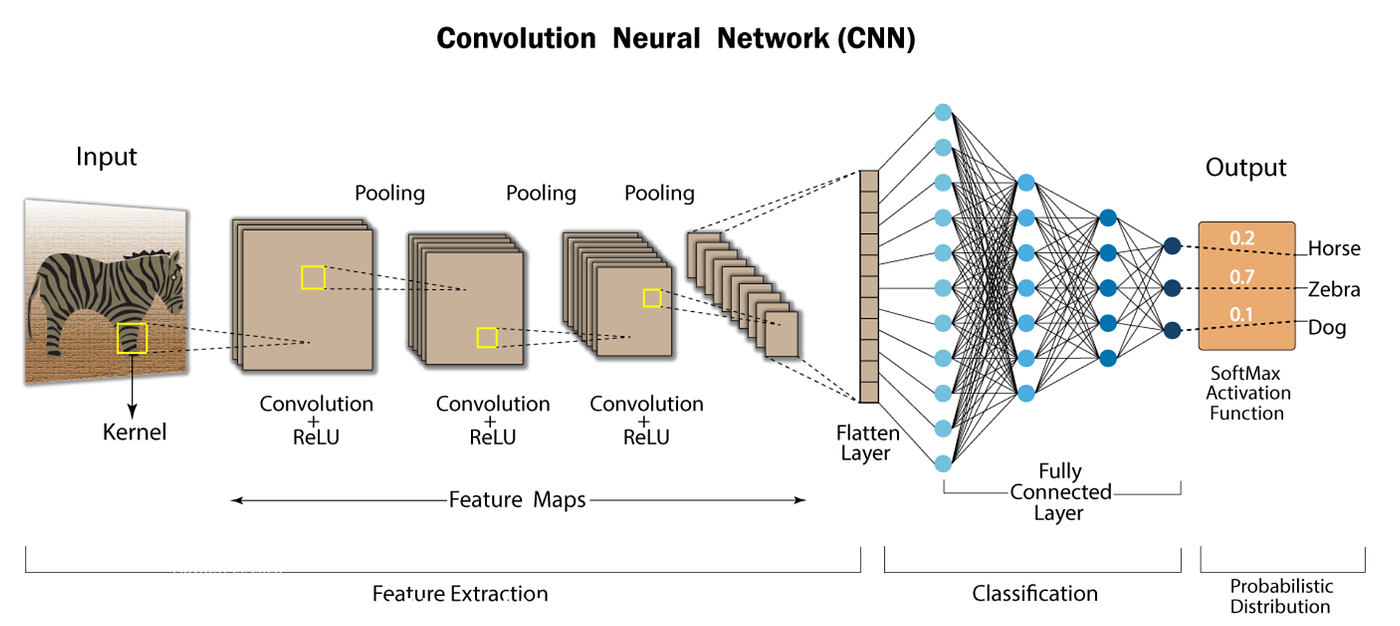

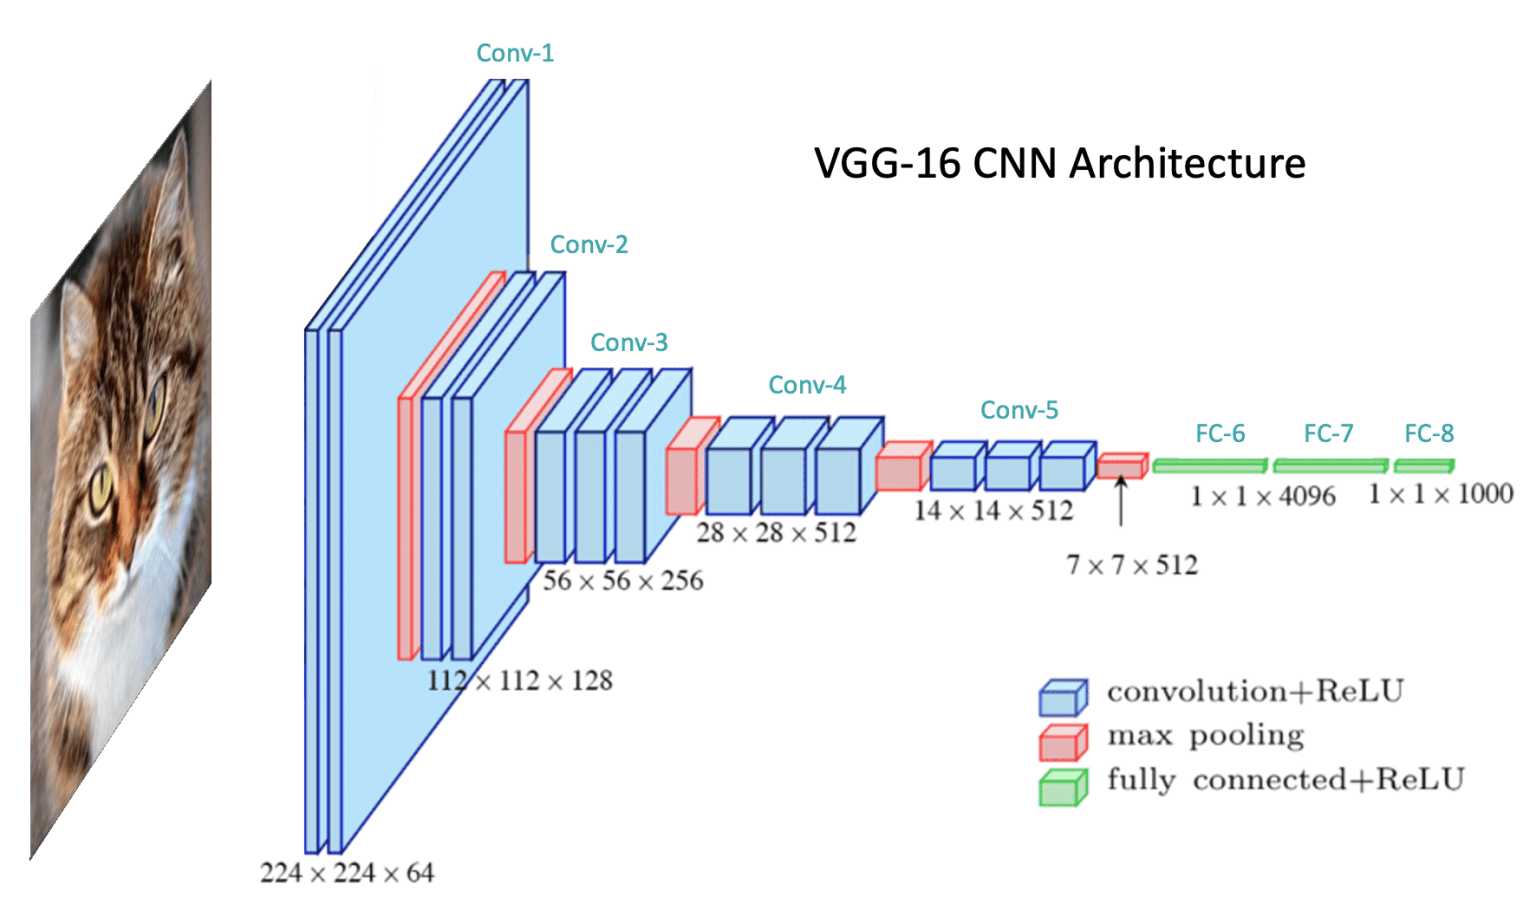

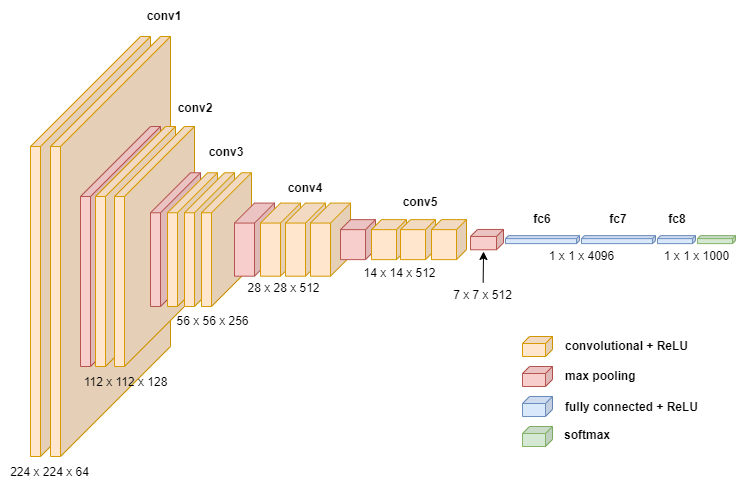

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8698 - loss: 0.4328 - val_accuracy: 0.9872 - val_loss: 0.0522
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9832 - loss: 0.0578 - val_accuracy: 0.9873 - val_loss: 0.0448
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 28s 33ms/step - accuracy: 0.9874 - loss: 0.0401 - val_accuracy: 0.9885 - val_loss: 0.0413
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9907 - loss: 0.0277 - val_accuracy: 0.9907 - val_loss: 0.0351
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9936 - loss: 0.0202 - val_accuracy: 0.9882 - val_loss: 0.0407
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9868 - loss: 0.0428
Test accuracy: 0.9899


<function matplotlib.pyplot.show(close=None, block=None)>

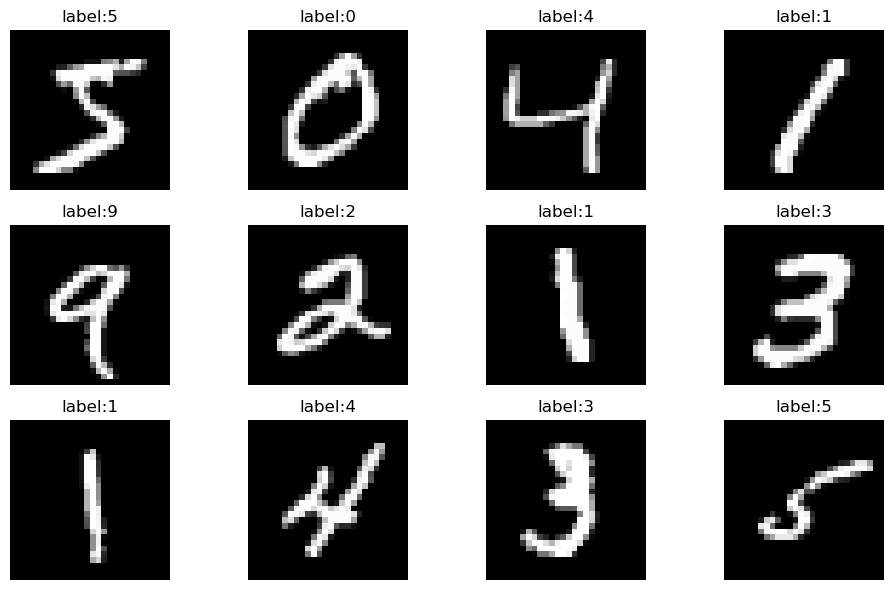

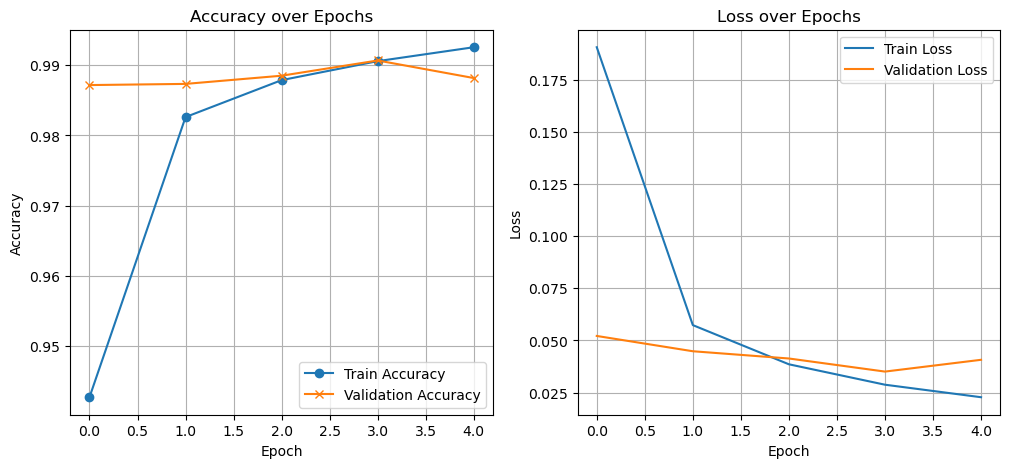

In [7]:
# importing libraries and modules
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize the image
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32")/255.0  #Reshape: Adds a channel dimension to match CNN input format (batch_size, height, width, channels).
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32")/255.0

# visualizing the sample images
plt.figure(figsize=(10, 6))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray") # Reshapes the image back to 28×28 (from the 4D tensor format) and displays it in grayscale.
    plt.title(f"label:{y_train[i]}")
    plt.axis("off")
plt.tight_layout()

# build the CNN model
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation="relu"),  # First convolutional layer
    layers.MaxPooling2D((2, 2)),                                           # First pooling layer
    layers.Conv2D(64, (3, 3), activation="relu"),                          # Second convolutional layer
    layers.MaxPooling2D((2, 2)),                                           # Second pooling layer
    layers.Flatten(),                                                     # Flatten the 2D feature maps into 1D
    layers.Dense(64, activation="relu"),                                  # Fully connected (dense) layer
    layers.Dense(10, activation="softmax")                                # Output layer for 10 classes (digits 0–9)
])

# compile the model
model.compile(optimizer="adam",
              loss = "sparse_categorical_crossentropy",  #appropriate for integer labels
              metrics=["accuracy"])

# train the model and store history object
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)  # can also use validation_data = (x_test,y_test) instead of validation_split
                                                                                    
# evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy:", round(test_acc, 4))

plt.figure(figsize=(12, 5))

# plot training and validation accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker="o")  # history.history is a dictionary that contains training and validation metrics for each epoch.
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker="x")
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# plot the training and validation loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = "Train Loss")
plt.plot(history.history['val_loss'], label = "Validation Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.show